In [7]:
import tensorflow as tf
from tensorflow.keras.applications import Xception  # Change to Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Input, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augmentation

# Check if GPU is available
tf.test.is_gpu_available()

batchsize = 8

# Data augmentation for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=0.2, shear_range=0.2,
                                   zoom_range=0.2, width_shift_range=0.2,
                                   height_shift_range=0.2, validation_split=0.2)

train_data = train_datagen.flow_from_directory('/Users/air/Desktop/Prepared Data/train',
                                               target_size=(80, 80), batch_size=batchsize,
                                               class_mode='categorical', subset='training')

validation_data = train_datagen.flow_from_directory('/Users/air/Desktop/Prepared Data/train',
                                                    target_size=(80, 80), batch_size=batchsize,
                                                    class_mode='categorical', subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory('/Users/air/Desktop/Prepared Data/test',
                                             target_size=(80, 80), batch_size=batchsize,
                                             class_mode='categorical')

# Change model to Xception
bmodel = Xception(include_top=False, weights='imagenet', input_tensor=Input(shape=(80, 80, 3)))

# Add custom layers
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2, activation='softmax')(hmodel)

# Create final model
model = Model(inputs=bmodel.input, outputs=hmodel)

# Freeze the base model layers
for layer in bmodel.layers:
    layer.trainable = False

model.summary()

# Set up callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('/Users/air/Desktop/Prepared Data/models/xception_model.keras',
                             monitor='val_loss', save_best_only=True, verbose=3)

earlystop = EarlyStopping(monitor='val_loss', patience=7, verbose=3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=3)

callbacks = [checkpoint, earlystop, learning_rate]

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data) // batchsize,
    validation_data=validation_data,
    validation_steps=len(validation_data) // batchsize,
    callbacks=callbacks,
    verbose=1  # Optional: Control the verbosity of output
)

# Evaluate the model on training data
acc_tr, loss_tr = model.evaluate(train_data)
print(f"Training Accuracy: {acc_tr}, Loss: {loss_tr}")

# Evaluate the model on validation data
acc_vr, loss_vr = model.evaluate(validation_data)
print(f"Validation Accuracy: {acc_vr}, Loss: {loss_vr}")

# Evaluate the model on test data
acc_test, loss_test = model.evaluate(test_data)
print(f"Test Accuracy: {acc_test}, Loss: {loss_test}")


Found 63970 images belonging to 2 classes.
Found 15991 images belonging to 2 classes.
Found 4937 images belonging to 2 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 80, 80, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 39, 39,    │        864 │ input_layer_1[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 39, 39,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 39, 39,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 37, 37,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 37, 37,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 37, 37,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 37, 37,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 37, 37,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 37, 37,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 37, 37,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 37, 37,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 19, 19,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 19, 19,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 19,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 19, 19,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 19, 19,    │          0 │ add_12[0][0]    

 Total params: 22,041,322 (84.08 MB)

 Trainable params: 1,179,842 (4.50 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_136']. Received: the structure of inputs=*
  warnings.warn(


999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.8357 - loss: 0.4908
Epoch 1: val_loss improved from inf to 0.28873, saving model to /Users/air/Desktop/Prepared Data/models/xception_model.keras
999/999 ━━━━━━━━━━━━━━━━━━━━ 622s 612ms/step - accuracy: 0.8357 - loss: 0.4907 - val_accuracy: 0.8715 - val_loss: 0.2887 - learning_rate: 0.0010
Epoch 2/5
999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.9058 - loss: 0.2509
Epoch 2: val_loss improved from 0.28873 to 0.22404, saving model to /Users/air/Desktop/Prepared Data/models/xception_model.keras
999/999 ━━━━━━━━━━━━━━━━━━━━ 696s 697ms/step - accuracy: 0.9057 - loss: 0.2509 - val_accuracy: 0.9162 - val_loss: 0.2240 - learning_rate: 0.0010
Epoch 3/5
999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.9035 - loss: 0.2305
Epoch 3: val_loss did not improve from 0.22404
999/999 ━━━━━━━━━━━━━━━━━━━━ 722s 723ms/step - accuracy: 0.9035 - loss: 0.2305 - val_accuracy: 0.9006 - val_loss: 0.2343 - learning_rate: 0.0010
Epoch 4/5
999

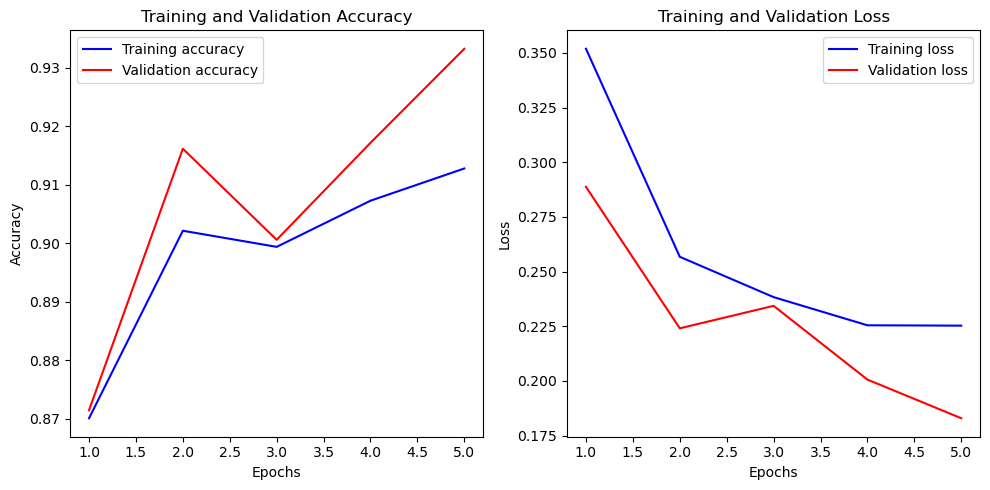

Learning rate was not logged during training.
618/618 ━━━━━━━━━━━━━━━━━━━━ 152s 241ms/step


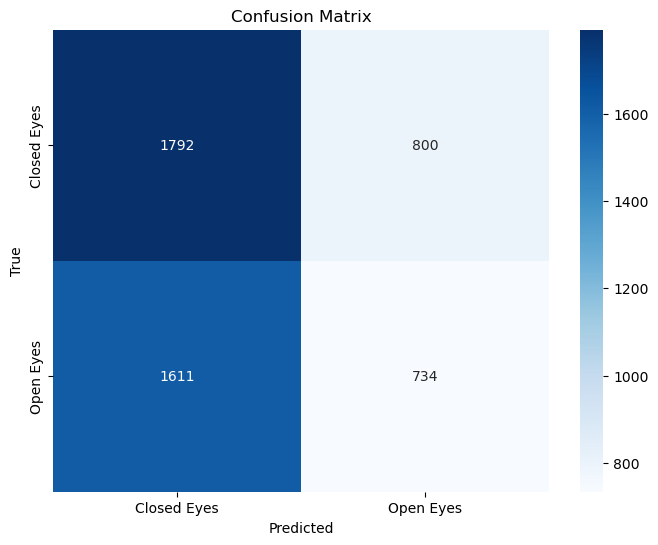

618/618 ━━━━━━━━━━━━━━━━━━━━ 165s 266ms/step


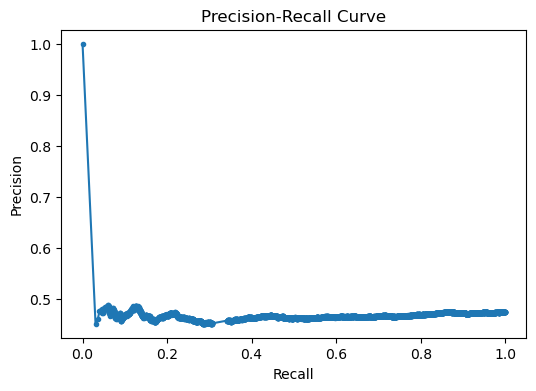

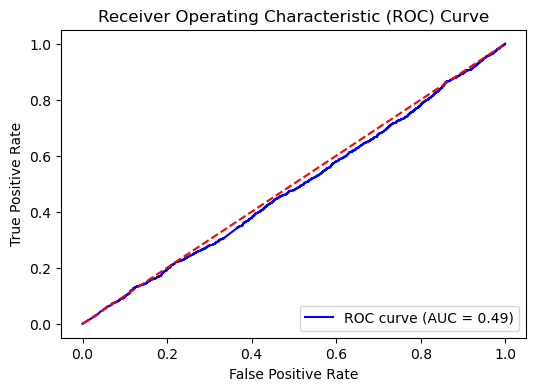

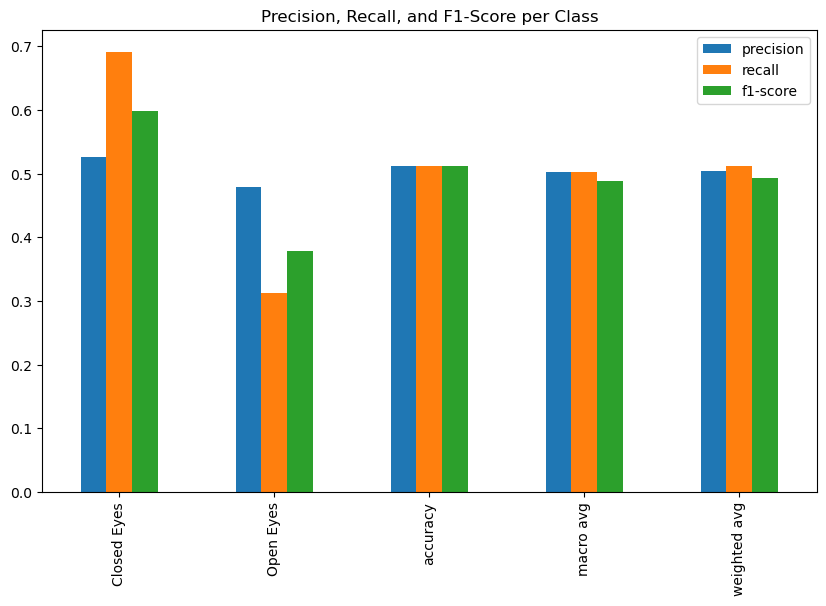

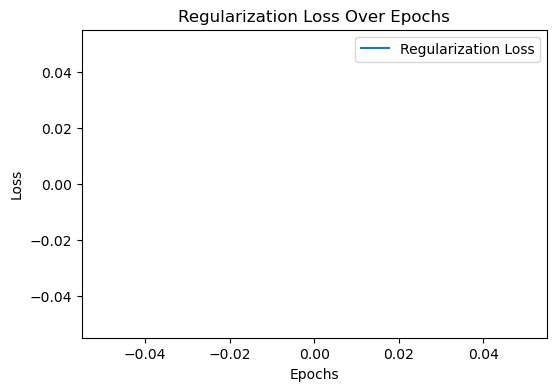

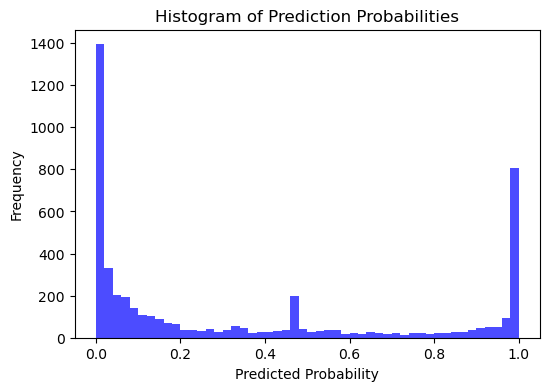

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, classification_report
import seaborn as sns
import pandas as pd

# 1. Training and Validation Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Learning Rate Schedule (only if logged)
if 'lr' in history.history:
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['lr'], label='Learning Rate')
    plt.title('Learning Rate Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.show()
else:
    print("Learning rate was not logged during training.")

# 3. Confusion Matrix
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 4. Precision-Recall Curve
Y_prob = model.predict(test_data)
precision, recall, thresholds = precision_recall_curve(y_true, Y_prob[:, 1])

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_true, Y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 6. Precision, Recall, F1-Score per Class
report = classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys()), output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), title='Precision, Recall, and F1-Score per Class')
plt.show()

# 7. Regularization Loss (if applicable)
regularization_losses = model.losses

plt.figure(figsize=(6, 4))
plt.plot(regularization_losses, label='Regularization Loss')
plt.title('Regularization Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 8. Histogram of Prediction Probabilities
plt.figure(figsize=(6, 4))
plt.hist(Y_prob[:, 1], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Prediction Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


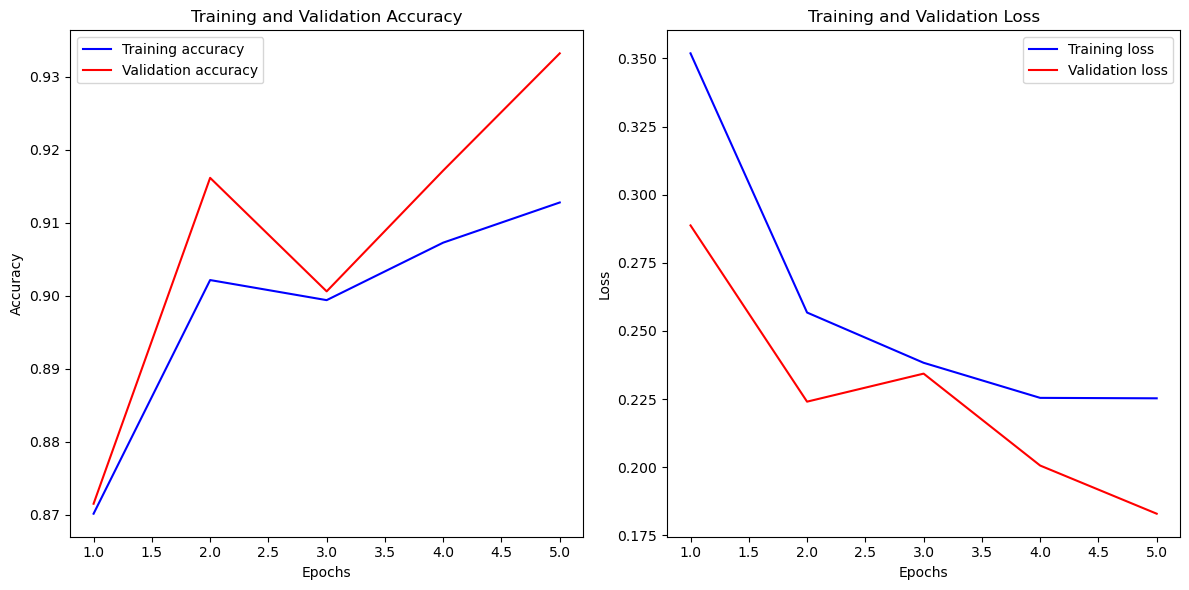

618/618 ━━━━━━━━━━━━━━━━━━━━ 154s 247ms/step


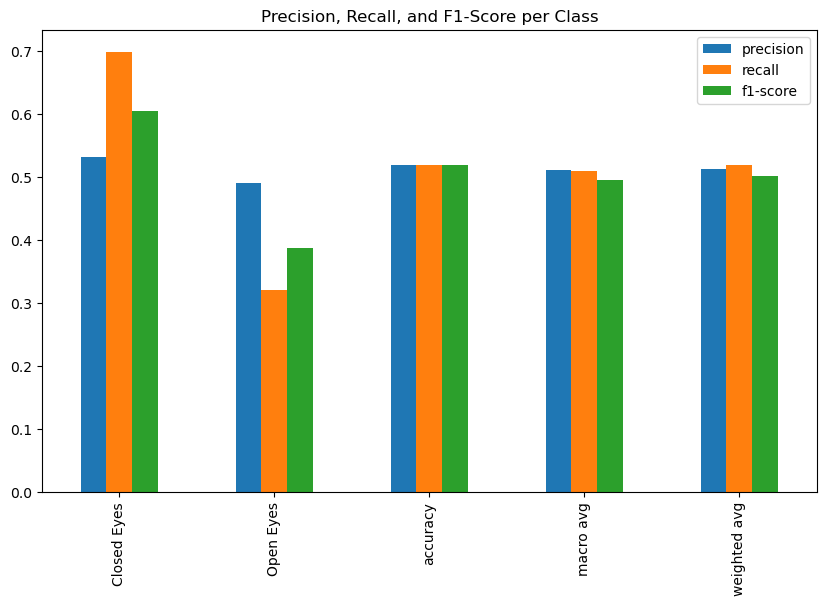

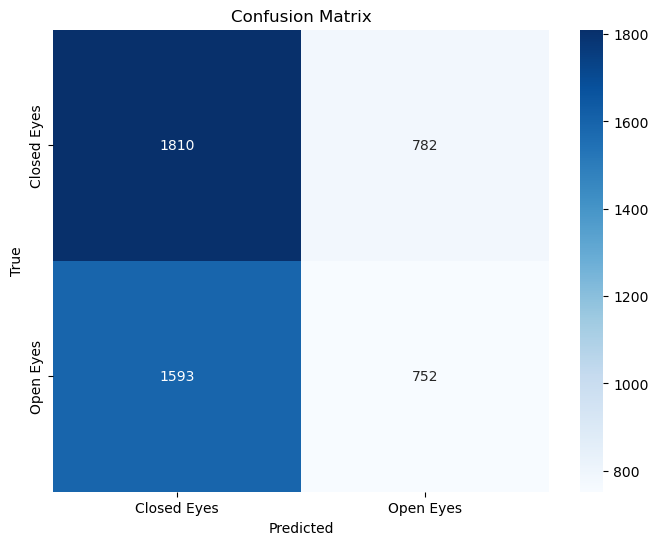

618/618 ━━━━━━━━━━━━━━━━━━━━ 296s 479ms/step


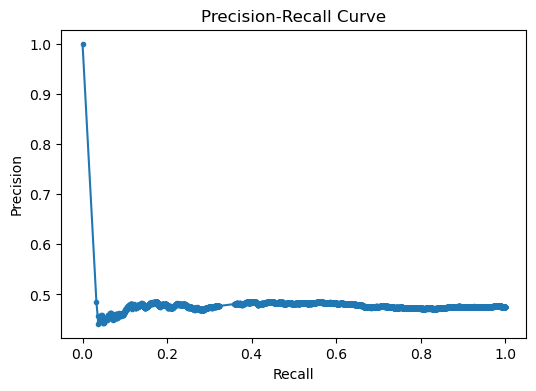

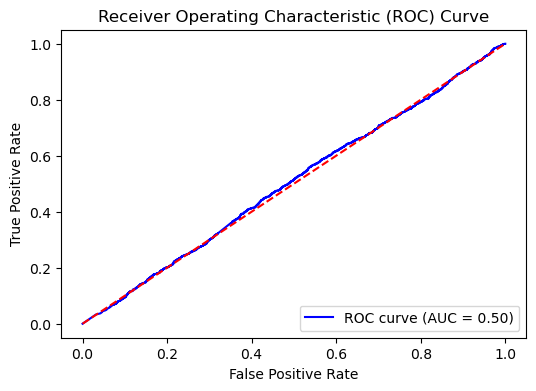

Learning rate was not logged during training.


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
import seaborn as sns
import pandas as pd

# Training and Validation Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Precision, Recall, F1-Score per Class
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes

# Classification report for precision, recall, F1-score
report = classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys()), output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Precision, Recall, F1-score per class as bar plot
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), title='Precision, Recall, and F1-Score per Class')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Precision-Recall Curve
Y_prob = model.predict(test_data)
precision, recall, _ = precision_recall_curve(y_true, Y_prob[:, 1])

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, Y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Learning Rate Schedule
if 'lr' in history.history:
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['lr'], label='Learning Rate')
    plt.title('Learning Rate Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.show()
else:
    print("Learning rate was not logged during training.")


In [15]:
# Gather metrics
train_accuracy = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data, verbose=0)

# Print the values directly
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Loss: {train_loss}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Loss: {val_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")


Training Accuracy: 0.9127877950668335
Training Loss: 0.22526416182518005
Validation Accuracy: 0.9332329034805298
Validation Loss: 0.18291021883487701
Test Accuracy: 0.8316791653633118
Test Loss: 0.3406432867050171
